# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Data generation
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.2)


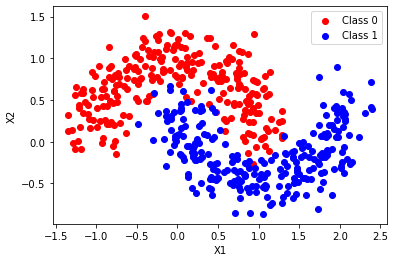

In [2]:
### This function allows to plot the two moons

plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", c='r', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", c='b', marker='o')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

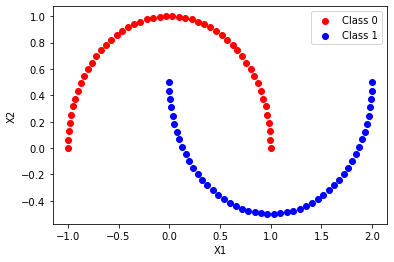

In [3]:
X, y = sklearn.datasets.make_moons(n_samples=100, noise=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", c='r', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", c='b', marker='o')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

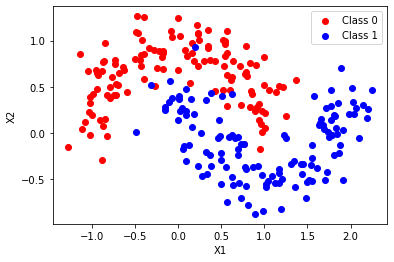

In [4]:
X, y = sklearn.datasets.make_moons(n_samples=250, noise=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", c='r', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", c='b', marker='o')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [5]:
from tensorflow import keras



In [6]:
def initialize_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(5, activation='relu', input_dim=2))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

You are now ready to train your algorithm on the training set:

In [8]:
model.fit(X_train, y_train,  epochs=20)
model.summary()


Epoch 1/20
6/6 [==============================] - 1s 2ms/step - loss: 0.8220 - accuracy: 0.3029
Epoch 2/20
6/6 [==============================] - 0s 2ms/step - loss: 0.8145 - accuracy: 0.3029
Epoch 3/20
6/6 [==============================] - 0s 2ms/step - loss: 0.8071 - accuracy: 0.3200
Epoch 4/20
6/6 [==============================] - 0s 2ms/step - loss: 0.8002 - accuracy: 0.3429
Epoch 5/20
6/6 [==============================] - 0s 2ms/step - loss: 0.7935 - accuracy: 0.3429
Epoch 6/20
6/6 [==============================] - 0s 2ms/step - loss: 0.7874 - accuracy: 0.3371
Epoch 7/20
6/6 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.3314
Epoch 8/20
6/6 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.3257
Epoch 9/20
6/6 [==============================] - 0s 2ms/step - loss: 0.7698 - accuracy: 0.3314
Epoch 10/20
6/6 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.3314
Epoch 11/20
6/6 [======================

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [9]:
history = model.fit(X_train, y_train, epochs=100)
history.__dict__

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7170 - accuracy: 0.4686
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.4571
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.4629
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.4629
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.4800
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4857
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4971
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5314
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5829
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5943
Epoch 11/100
6/6 [===========

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x1ce36714a00>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7169700264930725,
   0.713575541973114,
   0.7103262543678284,
   0.7073578834533691,
   0.7044862508773804,
   0.7015017867088318,
   0.6987425088882446,
   0.6960315704345703,
   0.6932938694953918,
   0.690687894821167,
   0.6880965232849121,
   0.685553252696991,
   0.6830088496208191,
   0.6805533766746521,
   0.6779128313064575,
   0.675462007522583,
   0.6731247305870056,
   0.6706737875938416,
   0.6683726906776428,
   0.6660061478614807,
   0.6636186242103577,
   0.6612535715103149,
   0.6588484048843384,
   0.6565308570861816,
   0.6541823148727417,
   0.6517714858055115,
   0.6495710611343384,
   0.6471034288406372,
   0.6447504758834839,
   0.6424734592437744,
   0.6399503946304321,
   0.6376733183860779,
   0.6353215575218201,
   0.6328637003898621,
   0.6305625438690186,
   0.6280307769775391,
   0.625

❓ Plot the history of the train loss using the following function

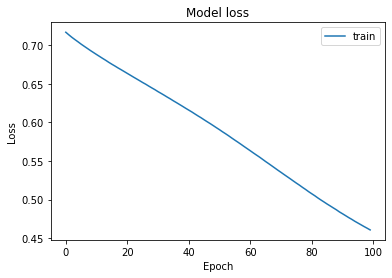

In [10]:
# Extract the training loss history
loss_history = history.history['loss']

# Plot the training loss history
plt.plot(loss_history)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [11]:
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 998us/step


You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)


3/3 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8667


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [13]:
accuracy = float(test_acc)
accuracy

0.8666666746139526

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

1775/1775 [==============================] - 2s 905us/step


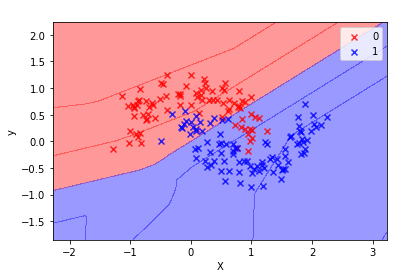

In [14]:
from utils.plots import plot_decision_regions

plot_decision_regions(X_train, y_train, model)

# Adding axes annotations
plt.xlabel('X')
plt.ylabel('y')
plt.title(' ')
plt.show()

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8240
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8240
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8240
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8240
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8240
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8240
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8240
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8240
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8240
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8240
Epoch 11/500
8/8 [===========

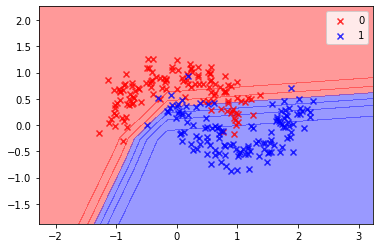

In [15]:
model.fit(X, y, epochs=500)
plot_decision_regions(X, y, model)


❓ Did the test accuracy improve?

In [16]:
y_pred = model.predict(X_test)
test_loss, acc = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9200


Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [19]:
def deeper_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(20, activation='relu', input_dim=2))
    model.add(keras.layers.Dense(10, activation='relu', input_dim=2))
    model.add(keras.layers.Dense(5, activation='relu', input_dim=2))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

Model = deeper_model()

❓ What is the number of parameters of your new model?

In [26]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

Epoch 1/20
6/6 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9829
Epoch 2/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9829
Epoch 3/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9886
Epoch 4/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9886
Epoch 5/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9886
Epoch 6/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9886
Epoch 7/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9886
Epoch 8/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9943
Epoch 9/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9886
Epoch 10/20
6/6 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9886
Epoch 11/20
6/6 [======================

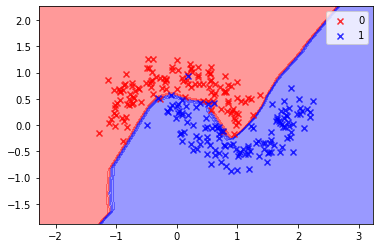

In [30]:
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Model.fit(X_train, y_train,  epochs=20)
Model.fit(X, y, epochs=500)
plot_decision_regions(X, y, Model)


In [31]:
y_pred = Model.predict(X_test)
loss, accu = Model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9733


❓ Do you think we have overfitted on the noise? Check it out below